Se importaron las librerías que se van a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Se cargaron las bases de datos.

In [2]:
i_acceso_provincia_bandas = pd.read_csv('data_etl/i_acceso_provincia_bandas.csv')
i_acceso_trimestral_bandas = pd.read_csv('data_etl/i_acceso_trimestral_bandas.csv')
i_acceso_trimestral_tecnología = pd.read_csv('data_etl/i_acceso_trimestral_tecnologia.csv')
i_conectividad_localidad = pd.read_csv('data_etl/i_conectividad_localidad.csv')
i_ingresos_trimestral = pd.read_csv('data_etl/i_ingresos_trimestral.csv')
i_penetracion_provincia = pd.read_csv('data_etl/i_penetracion_provincia.csv')
i_penetracion_trimestral = pd.read_csv('data_etl/i_penetracion_trimestral.csv')
i_servicio_localidad = pd.read_csv('data_etl/i_servicio_localidad.csv')
i_velocidad_localidad = pd.read_csv('data_etl/i_velocidad_localidad.csv')
i_velocidadm_provincia = pd.read_csv('data_etl/i_velocidadm_provincia.csv')
i_velocidadm_trimestral = pd.read_csv('data_etl/i_velocidadm_trimestral.csv')

Concatenar tablas de provincia:
i_acceso_provincia_bandas, i_penetracion_provincia,i_velocidadm_provincia

In [110]:
def merge_bases_datos(tablas):
    # Verificar si hay al menos dos tablas para combinar
    if len(tablas) < 2:
        raise ValueError('Se requieren al menos dos tablas para combinar.')

    # Combinar las bases de datos utilizando la columna 'Periodo' como clave
    tabla_provincia = tablas[0]
    for i in range(1, len(tablas)):
        tabla_provincia = pd.merge(tabla_provincia, tablas[i], on=['Provincia', 'Anio', 'Trimestre'], how='inner')

    return tabla_provincia

# Ejemplo de uso
tablas = [i_acceso_provincia_bandas, i_penetracion_provincia, i_velocidadm_provincia]

tabla_provincia = merge_bases_datos(tablas)

# Mostrar la tabla combinada
tabla_provincia

,Anio,Trimestre,Provincia,Banda ancha fija,Dial up,Total_x,Accesos por cada 100 hogares,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total_y
0,2022,3,Buenos Aires,4715469,6199.0,4721668,78.11,29985,27709,290315,297915,267044,12419,3618689,65821.0,4721668
1,2022,3,Capital Federal,1545534,2145.0,1547679,122.28,5170,5742,34371,67829,51946,28692,1253105,105477.0,1547679
2,2022,3,Catamarca,70292,1.0,70293,65.33,710,3840,3107,5389,5099,3737,50298,2208.0,70293
3,2022,3,Chaco,144141,5.0,144146,43.86,4610,9870,16782,18938,8049,15828,79390,3711.0,144146
4,2022,3,Chubut,164874,904.0,165778,84.38,1090,1444,45707,3094,34682,15309,17563,20024.0,165778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,2014,1,Santa Cruz,26304,460.0,26764,28.94,1610,1625,24972,10,10,0,0,0.0,26760
836,2014,1,Santa Fe,506000,612.0,506612,47.85,8456,124468,345225,20328,6845,230,668,0.0,506013
837,2014,1,Santiago Del Estero,37124,9.0,37133,16.31,1234,10531,22817,2422,1090,0,0,0.0,37113
838,2014,1,Tierra Del Fuego,27272,766.0,28038,63.97,120,6070,30902,60,0,0,0,0.0,31527


In [111]:
tabla_fil = tabla_provincia[tabla_provincia['Anio'] == '2022']
tabla_fil.groupby('Provincia')['Total_x'].sum()

Series([], Name: Total_x, dtype: int64)

Análisis inicial de  Tabla provincia

In [112]:
# Estructura general del conjunto de datos
print("Número de filas y columnas:", tabla_provincia.shape)

# Información sobre tipos de datos y valores faltantes
tabla_provincia.info()

# Estadísticas descriptivas básicas
tabla_provincia.describe()

Número de filas y columnas: (840, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 839
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Anio                          840 non-null    int64  
 1   Trimestre                     840 non-null    int64  
 2   Provincia                     840 non-null    object 
 3   Banda ancha fija              840 non-null    int64  
 4   Dial up                       840 non-null    float64
 5   Total_x                       840 non-null    int64  
 6   Accesos por cada 100 hogares  840 non-null    float64
 7   HASTA 512 kbps                840 non-null    int64  
 8   + 512 Kbps - 1 Mbps           840 non-null    int64  
 9   + 1 Mbps - 6 Mbps             840 non-null    int64  
 10  + 6 Mbps - 10 Mbps            840 non-null    int64  
 11  + 10 Mbps - 20 Mbps           840 non-null    int64  
 12  + 20 Mbps - 30 Mbps       

,Anio,Trimestre,Banda ancha fija,Dial up,Total_x,Accesos por cada 100 hogares,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total_y
count,840.000000,840.000000,8.400000e+02,840.000000,8.400000e+02,840.000000,840.000000,840.000000,8.400000e+02,840.000000,840.000000,840.000000,8.400000e+02,834.000000,8.400000e+02
mean,2017.885714,2.457143,3.447674e+05,974.307143,3.457417e+05,49.065750,2898.440476,10374.467857,1.509700e+05,33783.186905,34638.141667,19442.944048,7.917956e+04,4933.455635,3.439888e+05
std,2.528745,1.105009,7.400503e+05,2418.317775,7.419436e+05,23.151885,10900.554628,21587.794231,3.481538e+05,60759.295096,87389.351535,70347.380887,3.426234e+05,12139.331302,7.373366e+05
min,2014.000000,1.000000,1.219300e+04,0.000000,1.255700e+04,9.350000,60.000000,0.000000,2.842000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,2016.000000,1.000000,5.192225e+04,9.000000,5.202975e+04,32.107500,320.000000,1347.000000,2.853925e+04,2967.750000,2039.500000,190.000000,7.000000e+00,0.000000,5.232825e+04
50%,2018.000000,2.000000,1.029360e+05,148.000000,1.034895e+05,45.900000,1050.000000,3760.500000,4.883450e+04,8303.500000,7766.000000,2214.500000,8.825000e+02,0.000000,1.043330e+05
75%,2020.000000,3.000000,1.778685e+05,619.000000,1.779148e+05,61.865000,2565.750000,8328.250000,8.689750e+04,29956.000000,24396.500000,9284.000000,1.966075e+04,5275.500000,1.775798e+05
max,2022.000000,4.000000,4.715469e+06,15229.000000,4.721668e+06,124.060000,199768.000000,171244.000000,2.299705e+06,403575.000000,886678.000000,949093.000000,3.618689e+06,120464.000000,4.721668e+06


In [113]:
tabla_provincia['Anio'] = tabla_provincia['Anio'].astype(str)
tabla_provincia['Trimestre'] = tabla_provincia['Trimestre'].astype(str)

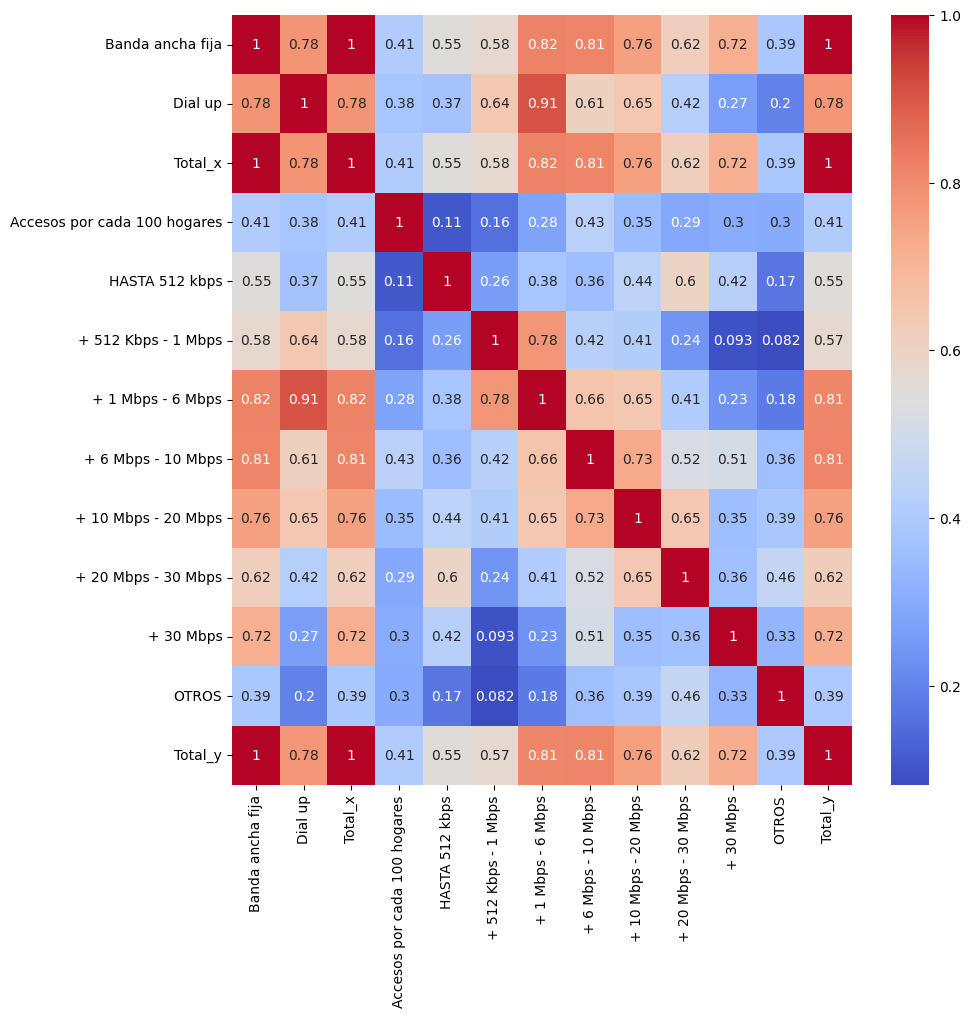

In [114]:
data = tabla_provincia

# Calcular la matriz de correlación
correlation_matrix = data.corr(numeric_only=True)

# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 10))  # Tamaño deseado: ancho=10, alto=8

# Crear un mapa de calor utilizando Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.show()

Eliminar columnas  no necesarias.

In [115]:
columnas = ['Anio', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares', 'Banda ancha fija', 'Dial up', 'Total_x']
tabla_provincia = tabla_provincia[columnas]

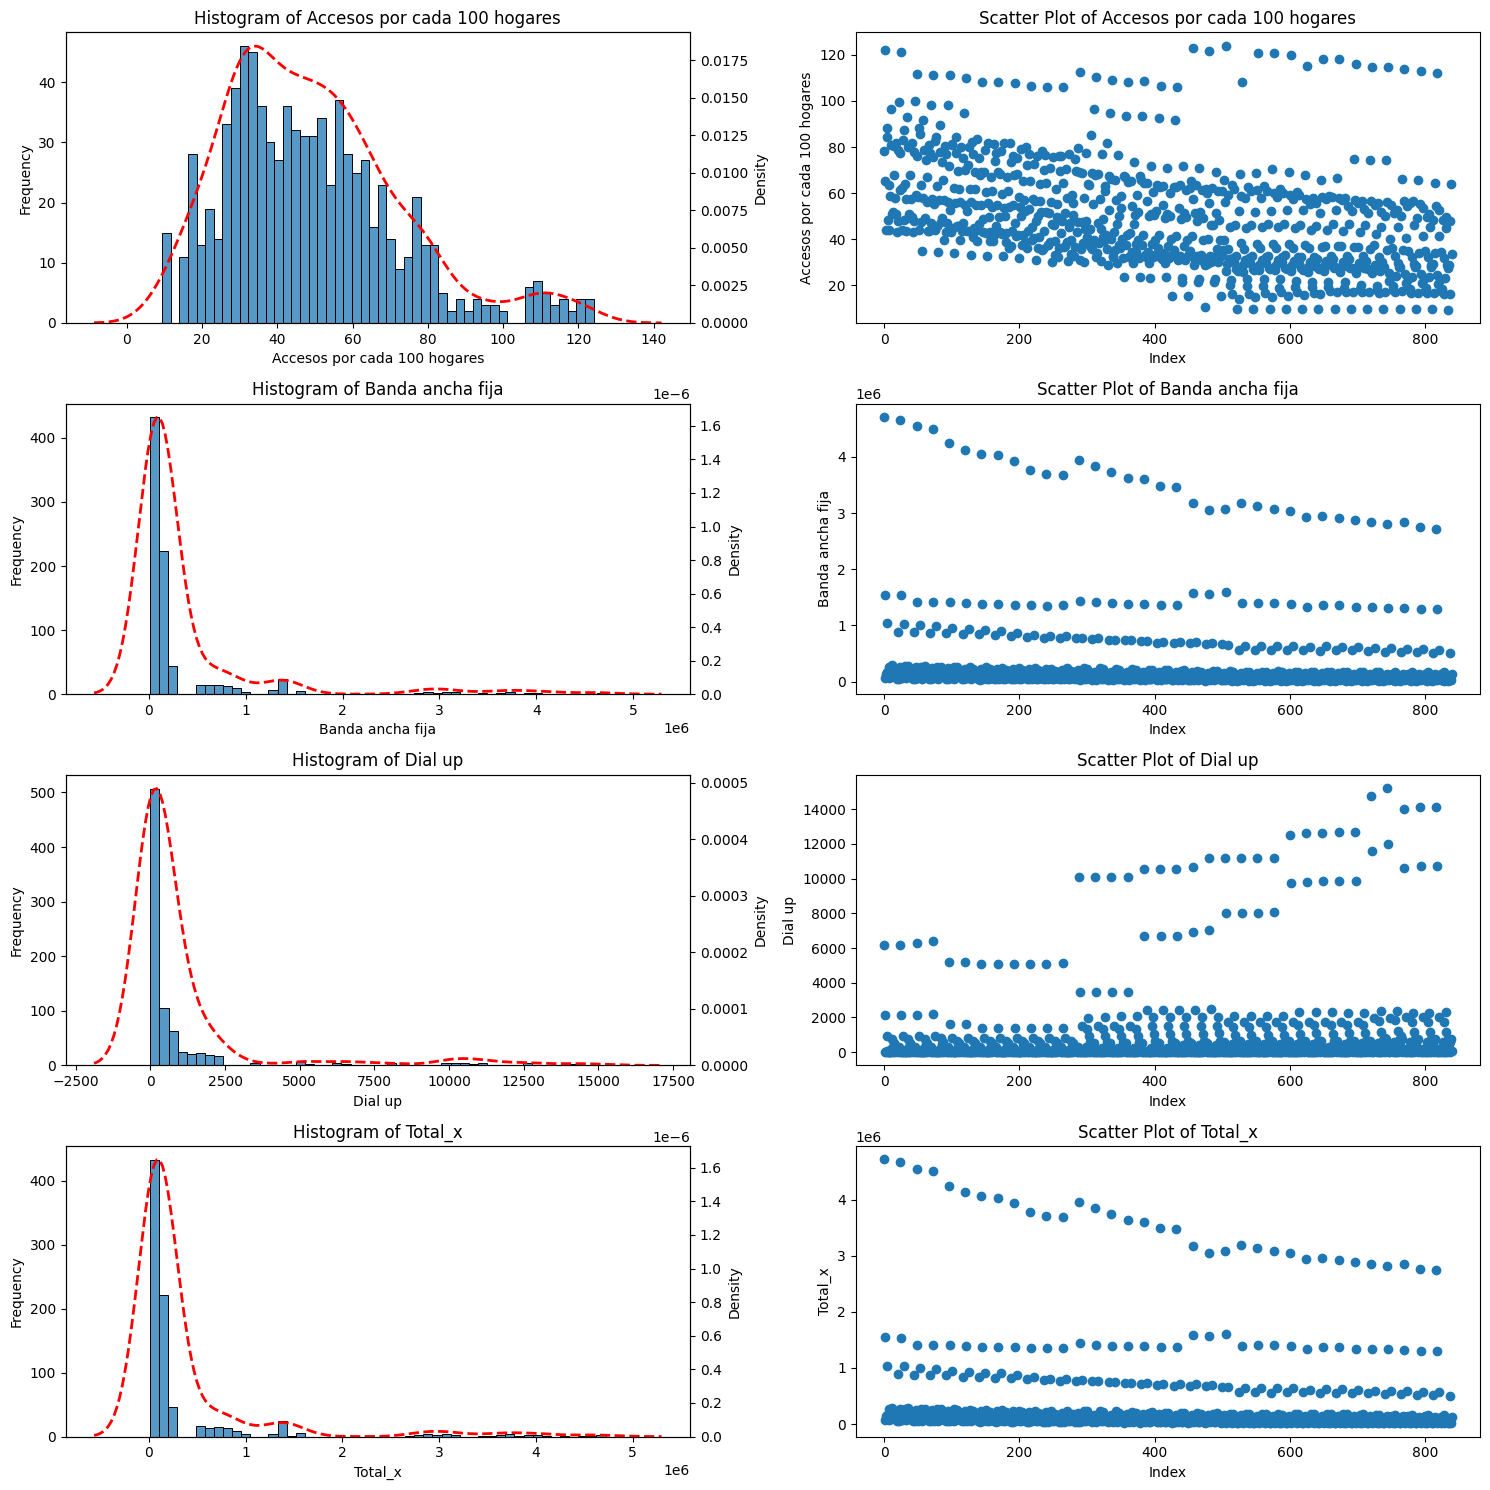

In [116]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
columnas = ['Accesos por cada 100 hogares', 'Banda ancha fija', 'Dial up', 'Total_x']
for i in range(4):
    #Histograma
    columna = columnas[i]
    ax = sns.histplot(tabla_provincia[columna], bins=50, kde=False, ax=axes[i, 0])
    ax.set_xlabel(columna)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {columna}')

    line_axes = ax.twinx()
    sns.kdeplot(tabla_provincia[columna], ax=line_axes, color='r', linewidth=2, linestyle='--')
    line_axes.set_ylabel('Density')

    # Diagrama de dispersión
    axes[i, 1].scatter(tabla_provincia.index, tabla_provincia[columna])
    axes[i, 1].set_xlabel('Index')
    axes[i, 1].set_ylabel(columna)
    axes[i, 1].set_title(f'Scatter Plot of {columna}')


plt.tight_layout()  # Ajustar el espaciado entre los subplots
plt.show()  

In [117]:
# Importar las librerías necesarias
#import pandas as pd
#import pandas_profiling

# Cargar los datos desde el archivo CSV
#data = tabla_provincia

# Generar el informe de pandas_profiling
#profile = pandas_profiling.ProfileReport(data)

# Guardar el informe en un archivo HTML
#profile.to_file("informe_eda_tablaprovincia.html")



NACIONAL

In [3]:
def merge_bases_datos(tablas):
    # Verificar si hay al menos dos tablas para combinar
    if len(tablas) < 2:
        raise ValueError('Se requieren al menos dos tablas para combinar.')

    # Combinar las bases de datos utilizando la columna 'Periodo' como clave
    tabla_trimestral = tablas[0]
    for i in range(1, len(tablas)):
        tabla_trimestral = pd.merge(tabla_trimestral, tablas[i], on=['Periodo', 'Anio', 'Trimestre'], how='inner')

    return tabla_trimestral

# Ejemplo de uso
tablas = [i_acceso_trimestral_bandas, i_acceso_trimestral_tecnología, i_ingresos_trimestral, i_penetracion_trimestral, i_velocidadm_trimestral]

tabla_trimestral = merge_bases_datos(tablas)

tabla_trimestral.to_csv('data_etl/i_nacional_trimestral.csv', index=False)
# Mostrar la tabla combinada
tabla_trimestral

,Anio,Trimestre,Banda ancha fija,Dial up,Total_x,Periodo,ADSL,Cablemodem,Fibra optica,Wireless,Otros,Total_y,Ingresos (miles de pesos),Accesos por cada 100 hogares,Accesos por cada 100 hab,Mbps (Media de bajada)
0,2022,3,11078691,12437,11091128,Jul-Sept 2022,1395277,6031970,2871541,557110,235230,11091128,67055930,76.64,23.95,62.46
1,2022,2,10946248,12436,10958684,Abr-Jun 2022,1468333,5979214,2723285,556243,231609,10958684,60335724,75.97,23.72,58.44
2,2022,1,10611390,12619,10624009,Ene-Mar 2022,1533240,6073426,2219533,545814,251996,10624009,55589997,73.88,23.05,55.11
3,2021,4,10476933,12861,10489794,Oct-Dic 2021,1657615,5984240,2072236,523107,252596,10489794,45467887,73.18,22.81,52.34
4,2021,3,10075184,10357,10085541,Jul-Sept 2021,1950631,5826257,1566048,492415,250190,10085541,42999944,70.58,21.98,48.46
5,2021,2,9852702,10382,9863084,Abr-Jun 2021,2018587,5641731,1472246,476968,253552,9863084,38239667,69.24,21.55,45.63
6,2021,1,9637956,10016,9647972,Ene-Mar 2021,2175211,5424782,1362976,434548,250455,9647972,36676371,67.95,21.13,43.11
7,2020,4,9561546,10016,9571562,Oct-Dic 2020,2213949,5371824,1311199,421554,253036,9571562,33539703,67.62,21.01,42.36
8,2020,3,9346183,10016,9356199,Jul-Sept 2020,2263889,5259351,1170879,413259,248821,9356199,31997445,66.31,20.59,40.67
9,2020,2,9021040,10016,9031056,Abr-Jun 2020,2295533,5005115,1106725,376667,247016,9031056,32102476,64.21,19.92,38.32


In [119]:
tabla_trimestral['Anio'] = tabla_trimestral['Anio'].astype(str)
tabla_trimestral['Trimestre'] = tabla_trimestral['Trimestre'].astype(str)

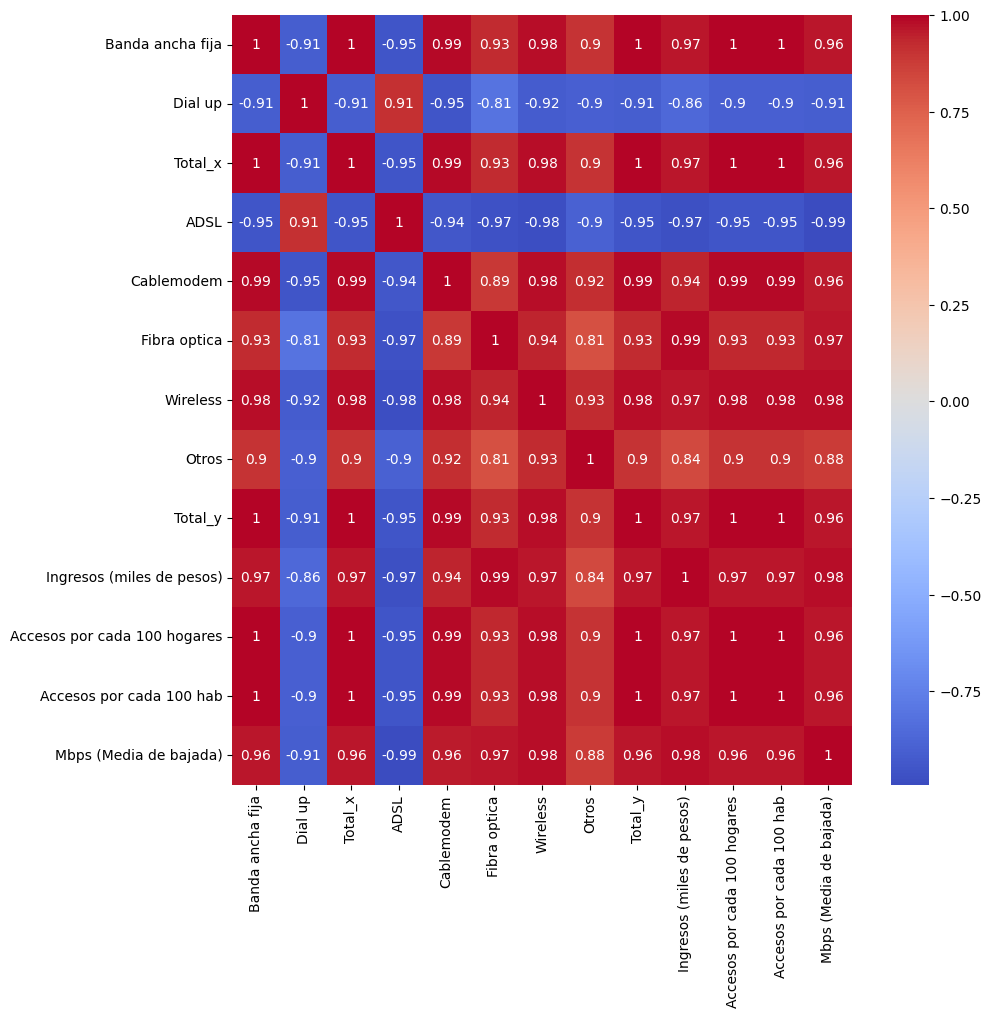

In [120]:
data = tabla_trimestral

# Calcular la matriz de correlación
correlation_matrix = data.corr(numeric_only=True)

# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 10))  # Tamaño deseado: ancho=10, alto=8

# Crear un mapa de calor utilizando Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.show()

i_servicio_localidad
i_velocidad_localidad
i_conectividad_localidad

In [121]:
i_servicio_localidad[i_servicio_localidad['Provincia'] == 'TIERRA DEL FUEGO']


,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
919,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Belgrano Ii,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,"-77,8740088546501","-34,6265601051448"
920,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Brown,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,"-64,8953481540258","-62,8705378154324"
921,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Carlini,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,"-62,2383693073102","-58,6675435788796"
922,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Esperanza,0,NO,NO,NO,NO,NO,NO,NO,NO,SI,NaN,"-63,3973928907224","-56,997322458775"
923,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Marambio,0,NO,NO,NO,NO,NO,NO,NO,SI,SI,NaN,"-64,2406140561753","-56,6250959571072"
924,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Matienzo,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,"-64,9758620236943","-60,0706791228407"
925,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Orcadas,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,"-60,737817304161","-44,7376600159669"
926,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base San Martin,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,"-68,1300703213167","-67,101329501464"
927,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Destacamento Camara,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,"-62,5943496603855","-59,9190536260268"
928,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Destacamento Decepcion,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,"-62,9753323251602","-60,6982227022535"


Hacer tabla donde muestre el total de localidades que tienen acceso de internet, el total de poblacion , el total con cada tipo de telecomunicacion.

In [122]:

Total_poblacion = i_servicio_localidad.groupby('Provincia')['Poblacion'].sum().sort_values()

Total_localidad = i_servicio_localidad.groupby('Provincia')['Localidad'].count().sort_values()

columnas_si_ADSL = i_servicio_localidad[i_servicio_localidad['ADSL'] == 'SI']
Total_localidad_ADSL = columnas_si_ADSL.groupby('Provincia')['ADSL'].count().sort_values()

columnas_si_CABLEMODEM = i_servicio_localidad[i_servicio_localidad['CABLEMODEM'] == 'SI']
Total_localidad_CABLEMODEM = columnas_si_CABLEMODEM.groupby('Provincia')['CABLEMODEM'].count().sort_values()

columnas_si_DIALUP = i_servicio_localidad[i_servicio_localidad['DIALUP'] == 'SI']
Total_localidad_DIALUP = columnas_si_DIALUP.groupby('Provincia')['DIALUP'].count().sort_values()

columnas_si_FIBRAOPTICA = i_servicio_localidad[i_servicio_localidad['FIBRAOPTICA'] == 'SI']
Total_localidad_FIBRAOPTICA = columnas_si_FIBRAOPTICA.groupby('Provincia')['FIBRAOPTICA'].count().sort_values()

columnas_si_SATELITAL = i_servicio_localidad[i_servicio_localidad['SATELITAL'] == 'SI']
Total_localidad_SATELITAL = columnas_si_SATELITAL.groupby('Provincia')['SATELITAL'].count().sort_values()

columnas_si_WIRELESS = i_servicio_localidad[i_servicio_localidad['WIRELESS'] == 'SI']
Total_localidad_WIRELESS = columnas_si_WIRELESS.groupby('Provincia')['WIRELESS'].count().sort_values()

columnas_si_TELEFONIAFIJA = i_servicio_localidad[i_servicio_localidad['TELEFONIAFIJA'] == 'SI']
Total_localidad_TELEFONIAFIJA = columnas_si_TELEFONIAFIJA.groupby('Provincia')['TELEFONIAFIJA'].count().sort_values()

columnas_si_3G = i_servicio_localidad[i_servicio_localidad['3G'] == 'SI']
Total_localidad_3G = columnas_si_3G.groupby('Provincia')['3G'].count().sort_values()

columnas_si_4G = i_servicio_localidad[i_servicio_localidad['4G'] == 'SI']
Total_localidad_4G = columnas_si_4G.groupby('Provincia')['4G'].count().sort_values()




In [123]:
data = {
    
    'Total poblacion': Total_poblacion,
    'Total localidad': Total_localidad,
    'Total localidad ADSL': Total_localidad_ADSL,
    'Total localidad CABLE MODEM': Total_localidad_CABLEMODEM,
    'Total localidad DIAL UP': Total_localidad_DIALUP,
    'Total localidad FIBRA OPTICA': Total_localidad_FIBRAOPTICA,
    'Total localidad SATELITAL': Total_localidad_SATELITAL,
    'Total localidad WIRELESS': Total_localidad_WIRELESS,
    'Total localidad TELEFONIA FIJA': Total_localidad_TELEFONIAFIJA,
    'Total localidad 3G': Total_localidad_3G,
    'Total localidad 4G': Total_localidad_4G
    
}

# Crear el DataFrame
df = pd.DataFrame(data)


In [124]:
df

,Total poblacion,Total localidad,Total localidad ADSL,Total localidad CABLE MODEM,Total localidad DIAL UP,Total localidad FIBRA OPTICA,Total localidad SATELITAL,Total localidad WIRELESS,Total localidad TELEFONIA FIJA,Total localidad 3G,Total localidad 4G
Provincia,,,,,,,,,,,
BUENOS AIRES,14911542,901,355,345,213.0,443,157,497,548,590,655
CABA,2890151,48,48,48,48.0,48,48,48,48,48,48
CATAMARCA,343343,182,7,3,1.0,23,48,33,31,29,57
CHACO,927414,92,28,14,1.0,45,43,46,47,44,75
CHUBUT,490554,90,13,11,15.0,13,49,31,54,31,38
CORDOBA,3139606,556,181,89,5.0,172,73,292,310,277,344
CORRIENTES,857994,78,21,9,1.0,12,55,45,51,39,70
ENTRE RIOS,1119919,194,47,39,4.0,44,22,130,128,78,128
FORMOSA,452714,63,13,3,NaN,16,23,59,30,16,42


De acuerdo con el EDA, se realizarán:
* Análisis de acuerdo a la penetración de los accesos por 100 hogares
* Analisis de cobertura del acceso de internet
* Analisis de comparación de ingresos

In [3]:
ingreso_tv_suscripcion = pd.read_csv('Television_ingresos.csv')
ingreso_telefonif = pd.read_csv('telefonia_fija.csv')

In [4]:
ingreso_tv_suscripcion.columns =ingreso_tv_suscripcion.columns.str.replace('Año', 'Anio')
ingreso_telefonif.columns =ingreso_telefonif.columns.str.replace('Año', 'Anio')

In [6]:
def merge_bases_datos(tablas):
    # Verificar si hay al menos dos tablas para combinar
    if len(tablas) < 2:
        raise ValueError('Se requieren al menos dos tablas para combinar.')

    # Combinar las bases de datos utilizando la columna 'Periodo' como clave
    tabla_ingresos = tablas[0]
    for i in range(1, len(tablas)):
        tabla_ingresos = pd.merge(tabla_ingresos, tablas[i], on=['Anio', 'Trimestre'], how='inner')

    return tabla_ingresos

# Ejemplo de uso
tablas = [i_ingresos_trimestral, ingreso_telefonif, ingreso_tv_suscripcion]

tabla_ingresos = merge_bases_datos(tablas)

# Mostrar la tabla combinada
tabla_ingresos

,Anio,Trimestre,Ingresos (miles de pesos),Periodo,Ingresos (miles de $),Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $)
0,2022,3,67055930,Jul-Sept 2022,"31.443.440,29","$ 52.242.784,63","$ 27.073.190,89"
1,2022,2,60335724,Abr-Jun 2022,"38.693.400,08","$ 46.292.673,44","$ 23.559.484,83"
2,2022,1,55589997,Ene-Mar 2022,27.985.609,"$ 42.093.870,19","$ 21.268.086,24"
3,2021,4,45467887,Oct-Dic 2021,"40.616.059,17","$ 38.273.391,8","$ 18.038.065,44"
4,2021,3,42999944,Jul-Sept 2021,"20.789.995,21","$ 36.398.025,53","$ 18.039.519,5"
5,2021,2,38239667,Abr-Jun 2021,"22.178.751,89","$ 33.674.995,79","$ 18.038.442,36"
6,2021,1,36676371,Ene-Mar 2021,"21.378.667,68","$ 31.924.515,01","$ 18.038.360,96"
7,2020,4,33539703,Oct-Dic 2020,"19.750.303,98","$ 26.324.098,62","$ 14.479.622,62"
8,2020,3,31997445,Jul-Sept 2020,"18.162.023,89","$ 25.386.154,6","$ 12.933.200,33"
9,2020,2,32102476,Abr-Jun 2020,"21.035.522,89","$ 24.620.009,49","$ 12.544.725,93"


In [7]:
tabla_ingresos.to_csv('data_etl/ingresos_servicios.csv', index=False)